In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!head churn.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
ipl = pd.read_csv('matches.csv', index_col='id', parse_dates=['date'])

In [7]:
ipl.shape

(756, 17)

In [8]:
ipl.columns

Index(['season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
season             756 non-null int64
city               749 non-null object
date               756 non-null datetime64[ns]
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: datetime64[ns](1), int64(4), object(12)
memory usage: 106.3+ KB


In [10]:
ipl.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
ipl.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


In [14]:
w_10 = ipl[ipl['win_by_ wicket'] == 10]

KeyError: 'win_by_ wicket'

In [15]:
w_10 = ipl[ipl['win_by_wickets'] == 10]

In [17]:
ipl.shape

(756, 17)

In [18]:
w_10.shape

(11, 17)

In [20]:
w_10['winner']

id
3             Kolkata Knight Riders
35                  Kings XI Punjab
72                  Deccan Chargers
120                Delhi Daredevils
184     Royal Challengers Bangalore
299                Rajasthan Royals
377                  Mumbai Indians
391             Chennai Super Kings
543     Royal Challengers Bangalore
591             Sunrisers Hyderabad
7941    Royal Challengers Bangalore
Name: winner, dtype: object

## CALC TOTAL NUMBER OF WINS BY EACH TEAM 

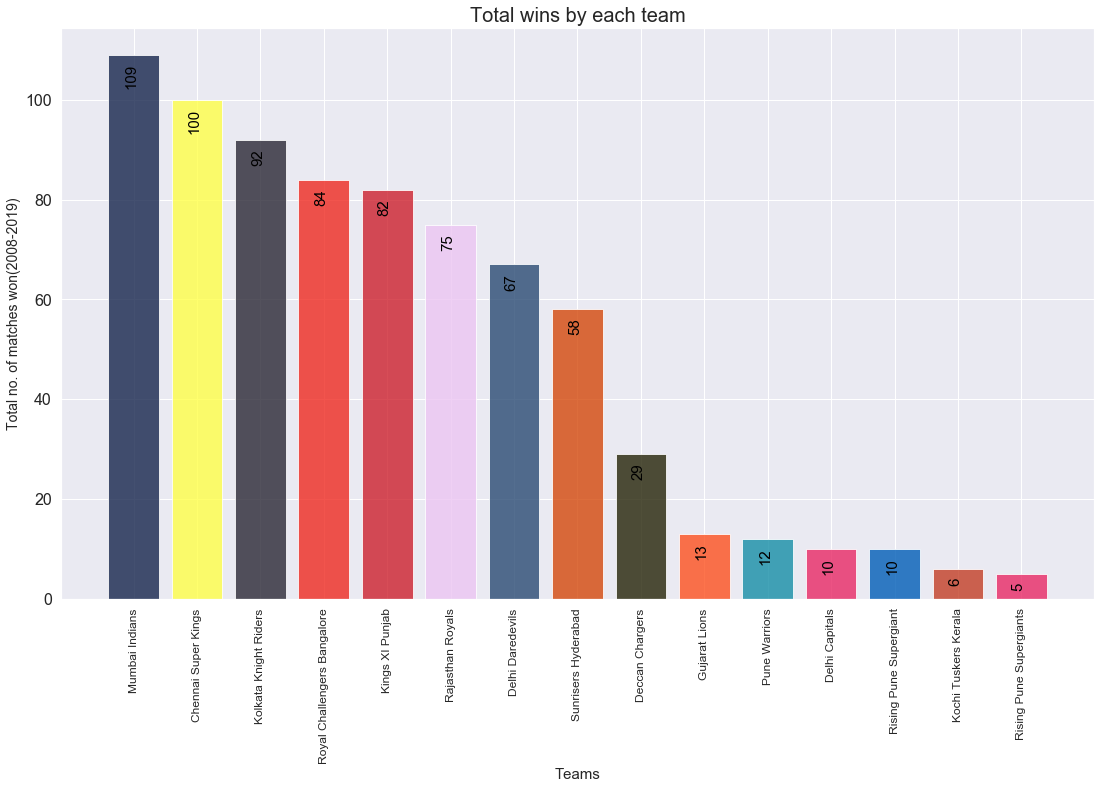

In [25]:
import seaborn as sns
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(ipl['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()


### FINDING THE PLAYER WITH MOST MOM

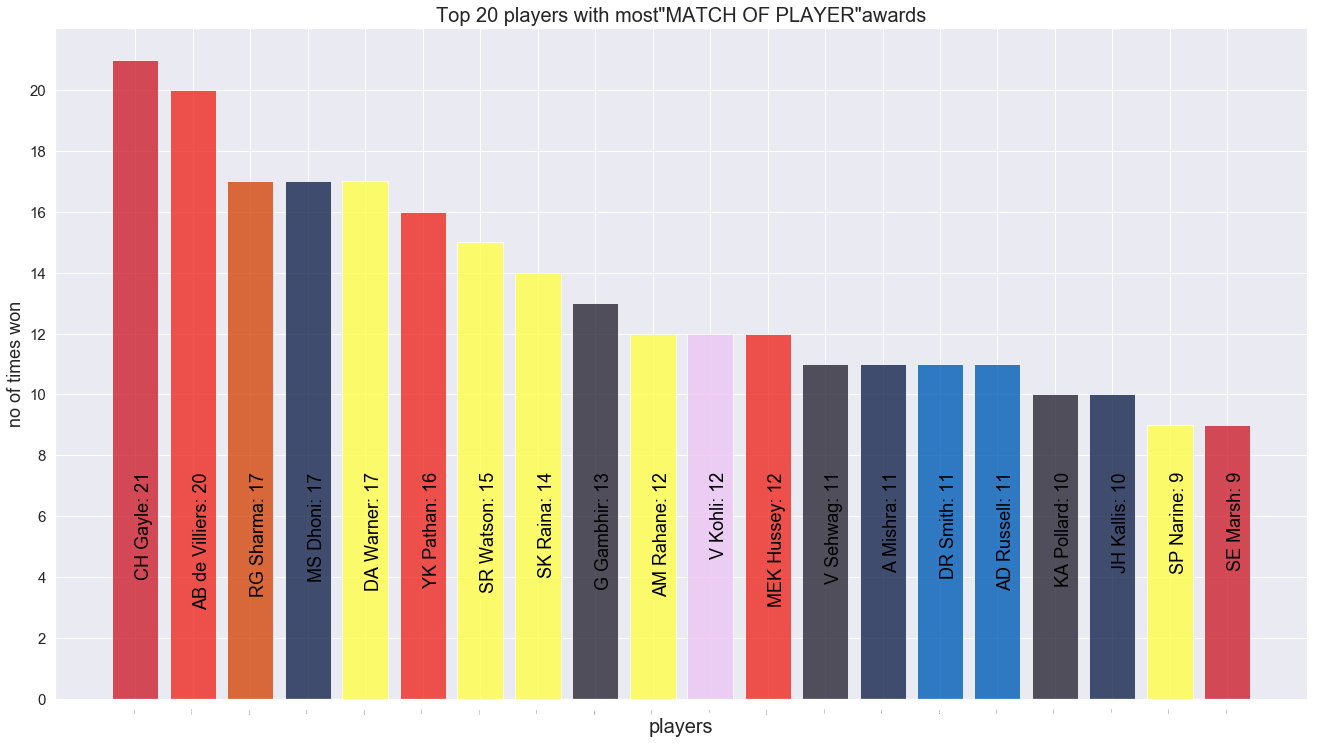

In [34]:
players = pd.DataFrame(ipl['player_of_match'].value_counts())
players['name']= players.index
players = players.head(20)
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count =0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most"MATCH OF PLAYER"awards',fontsize=20)
plt.xlabel('players',fontsize=20)
plt.ylabel('no of times won',fontsize=18)
plt.tight_layout()
plt.show()
    


### MATCHES HOSTED BY EACH CITY 

In [12]:
ipl = pd.read_csv('matches.csv', index_col='id', parse_dates=['date'])

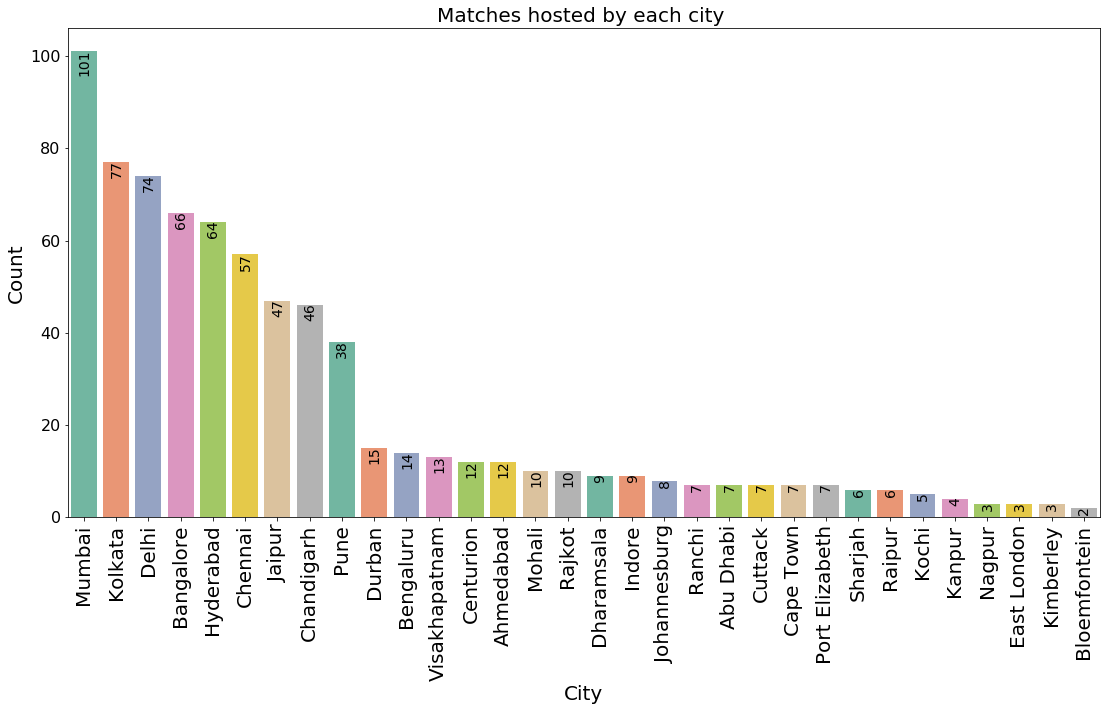

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(ipl['city'],order =ipl['city'].value_counts().index,palette='Set2')
plt.xlabel('City',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.xticks(rotation =90,fontsize=20)
plt.yticks(fontsize =16)
plt.title('Matches hosted by each city ',fontsize =20)
count =0
cities = pd.DataFrame(ipl['city'].value_counts())
cities['name']=ipl['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=14)
    count+=1
plt.show()    


###               MI V/S CSK HEAD TO HEAD

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

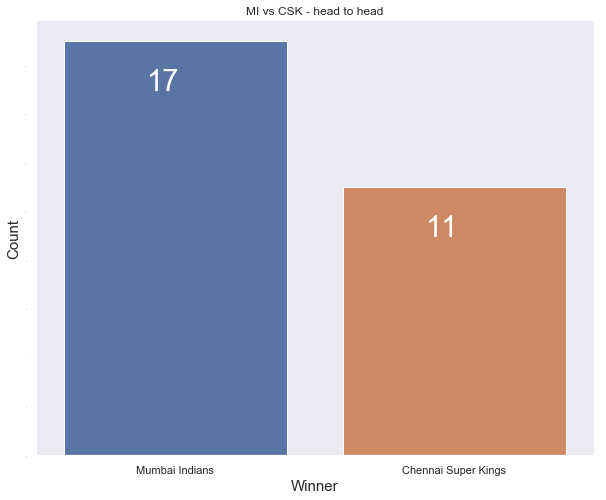

In [33]:
micsk=ipl[np.logical_or(np.logical_and(ipl['team1']=='Mumbai Indians',ipl['team2']=='Chennai Super Kings'),np.logical_and(ipl['team2']=='Mumbai Indians',ipl['team1']=='Chennai Super Kings'))]
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(micsk['winner'],order=micsk['winner'].value_counts().index)
plt.text(-0.1,15,str(micsk['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.text(0.9,9,str(micsk['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('MI vs CSK - head to head')
plt.show()

### MI V/S CSK BEST PERFORMANCE 

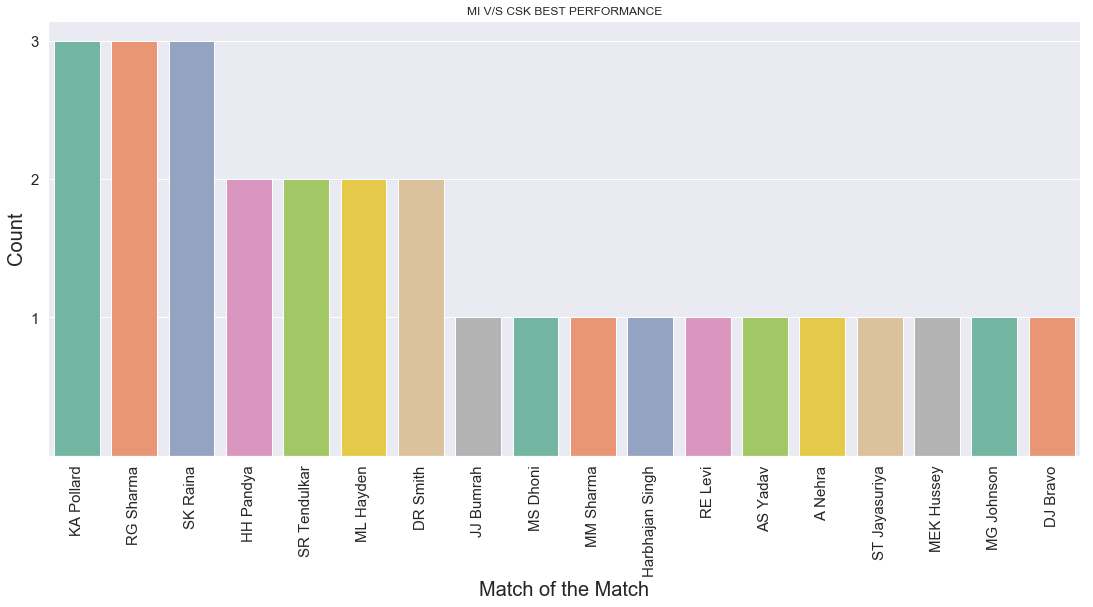

In [34]:
sns.set(style='darkgrid')
fig= plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['player_of_match'],order=micsk['player_of_match'].value_counts().index,palette='Set2')
plt.title('MI V/S CSK BEST PERFORMANCE')
plt.xticks(rotation=90,fontsize=15)
plt.yticks([1,2,3],[1,2,3],fontsize=15)
plt.xlabel('Match of the Match',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()


### TOSS DECISSION STATISTICS OF ALL MI V/S CSK MATCHES - VENUE WISE

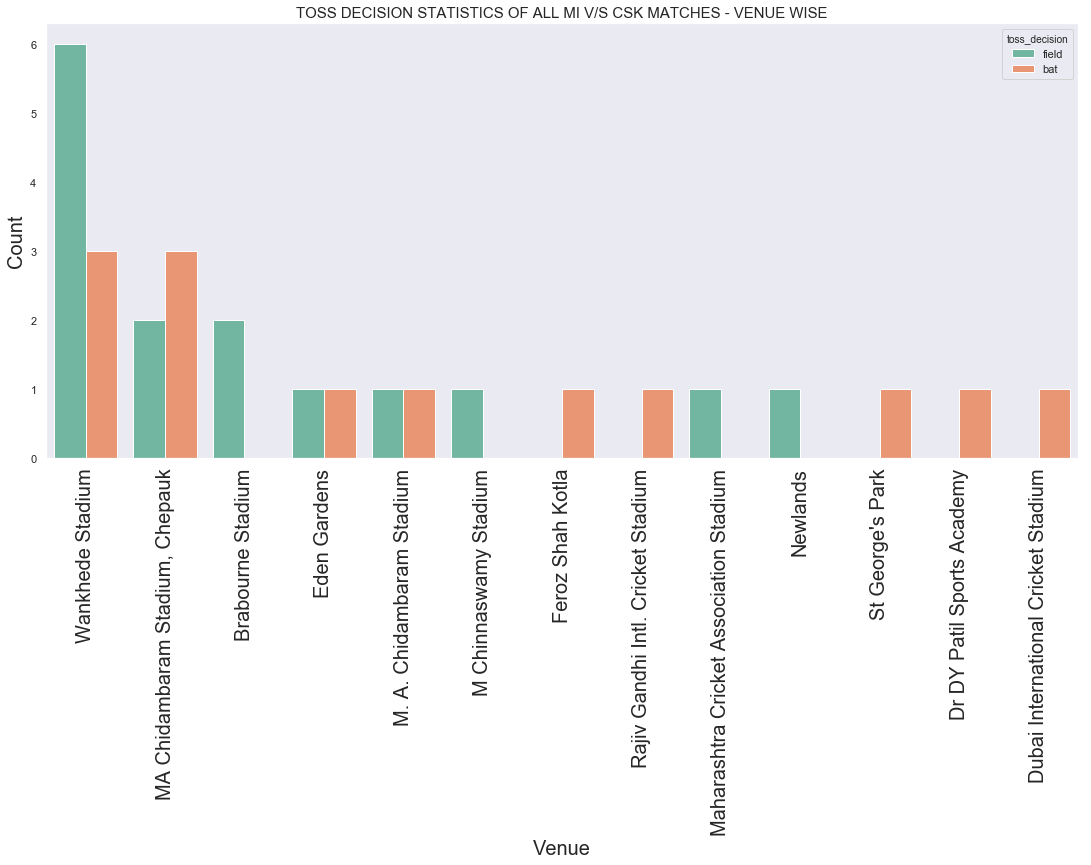

In [37]:
sns.set(style='dark')
fig = plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['venue'],order=micsk['venue'].value_counts().index,palette='Set2',hue =ipl['toss_decision'])
plt.title('TOSS DECISION STATISTICS OF ALL MI V/S CSK MATCHES - VENUE WISE',fontsize=15)
plt.xlabel('Venue',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.show()

In [1]:
import numpy as np 
import pandas as pd 
import  matplotlib.pyplot as plt 
import seaborn as sns

### SESSION WISE SUMMARY OF MATCHES WON BY RUNS

In [5]:
ipl = pd.read_csv('matches.csv', index_col='id', parse_dates=['date'])

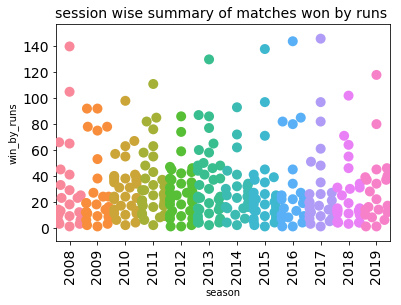

In [14]:
fig = plt.gcf
#fig.set_size_inches(18.5,10.5)
sns.swarmplot(ipl['season'],ipl[ipl['win_by_runs']!=0]['win_by_runs'],s=10)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.title('session wise summary of matches won by runs ',fontsize=14)
plt.show()